# GRIP - The Spark's Foundation
__    ___________

# Task 2 - Prediction of Unsupervised ML
________________________________________________________________________________________________

## Author : Prem Kumar S

### In this task we try to cluster the Iris dataset using DBSCAN and K-Means Clustering Method

###  Descriptions
____

![](david-gerster-hands-on-machine-learning-3-638.jpg)

![](1_f6KbPXwksAliMIsibFyGJw.png)

### Loading Important Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
Iris = pd.read_csv('Iris.csv')

In [3]:
#Information of the Dataset
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Shape of the dataset -- (150 rows , 6 Columns)
Iris.shape

(150, 6)

In [6]:
# Dataset Columns
Iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
# Unique Values in Label Column
Iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
# Column "Id" is important so we drop the "Id" column
Iris.drop("Id",axis=1,inplace=True)

## Exploratory Data Analysis

### Visualize the Dataset

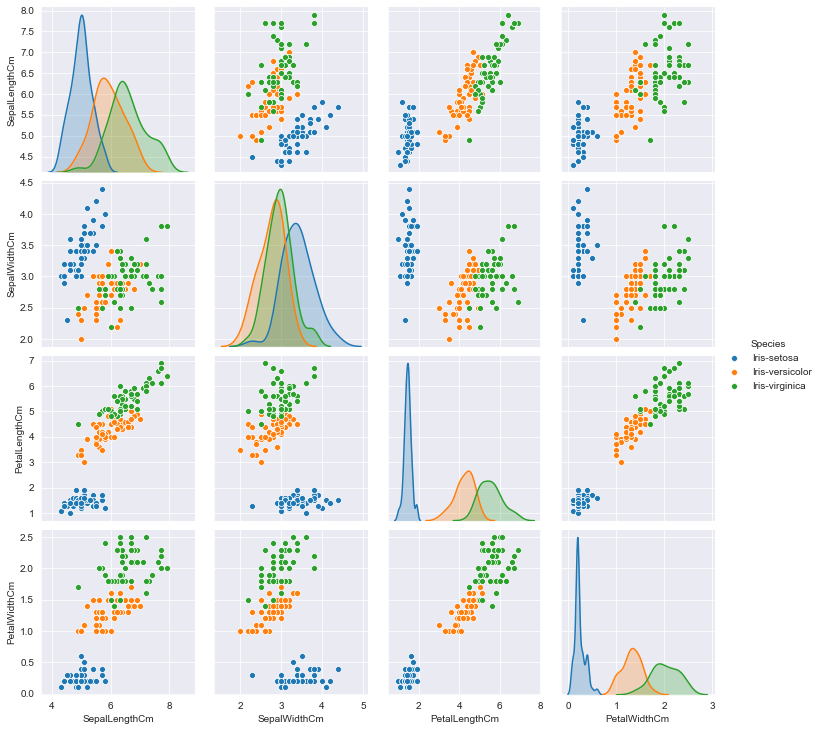

In [9]:
sns.set_style('darkgrid')
sns.pairplot(Iris,hue='Species')
plt.show()

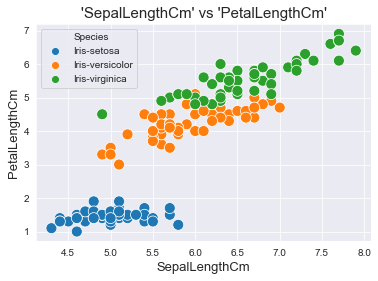

In [10]:
#Visualize the graph between 'SepalLengthCm' vs 'PetalLengthCm'
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',hue='Species',data=Iris,s=120)
plt.title("'SepalLengthCm' vs 'PetalLengthCm'",fontsize=15)
plt.xlabel('SepalLengthCm',fontsize=13)
plt.ylabel('PetalLengthCm',fontsize=13)
plt.show()

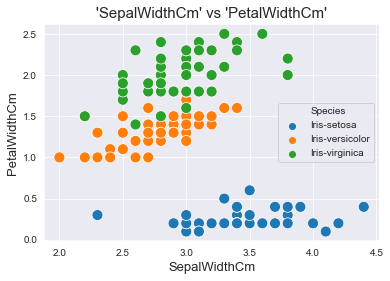

In [11]:
#Visualize the graph between 'SepalWidthCm' vs 'PetalWidthCm'
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',hue='Species',s=120,data=Iris)
plt.title("'SepalWidthCm' vs 'PetalWidthCm'",fontsize=15)
plt.xlabel('SepalWidthCm',fontsize=13)
plt.ylabel('PetalWidthCm',fontsize=13)
plt.show()

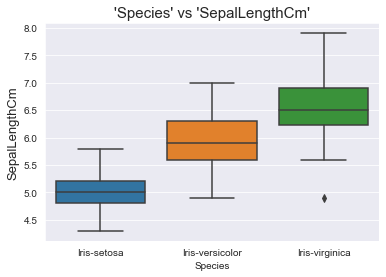

In [12]:
sns.boxplot(x="Species",y='SepalLengthCm',data=Iris)
plt.title("'Species' vs 'SepalLengthCm'",fontsize=15)
plt.ylabel('SepalLengthCm',fontsize=13)
plt.show()

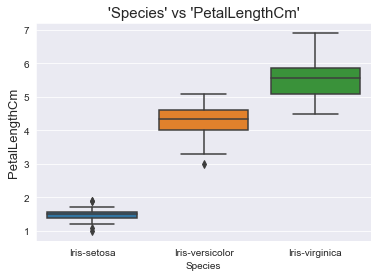

In [13]:
sns.boxplot(x="Species",y='PetalLengthCm',data=Iris)
plt.title("'Species' vs 'PetalLengthCm'",fontsize=15)
plt.ylabel('PetalLengthCm',fontsize=13)
plt.show()

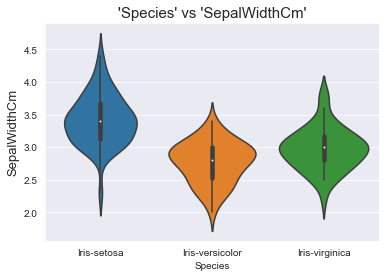

In [14]:
sns.violinplot(x="Species",y='SepalWidthCm',data=Iris)
plt.title("'Species' vs 'SepalWidthCm'",fontsize=15)
plt.ylabel('SepalWidthCm',fontsize=13)
plt.show()

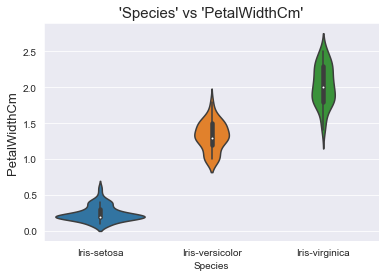

In [15]:
sns.violinplot(x="Species",y='PetalWidthCm',data=Iris)
plt.title("'Species' vs 'PetalWidthCm'",fontsize=15)
plt.ylabel('PetalWidthCm',fontsize=13)
plt.show()

In [16]:
X=Iris.iloc[:,0:4]
labels_true=Iris.iloc[:,4:]

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y=le.fit_transform(labels_true)
Y

C:\Users\Spk\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Implementing DBSCAN Algorithm

In [18]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn import metrics

In [19]:
db=DBSCAN(eps=0.7,min_samples=2,algorithm='kd_tree').fit(X)

In [20]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [21]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [22]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

"""Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters
contain only data points which are members of a single class."""

print("Homogeneity: %0.3f" % metrics.homogeneity_score(Y, labels))

Estimated number of clusters: 3
Estimated number of noise points: 1
Homogeneity: 0.592


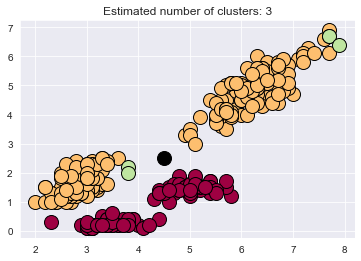

In [23]:
unique_labels = set(labels)  # identifying all the unique labels/clusters
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  # creating the list of colours, generating the colourmap



for k, col in zip(unique_labels, colors):
    
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)   # assigning class members for each class
    

    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class
    xy=xy.values
    plt.plot(xy[:,0:2], xy[:,2:4], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points
    xy=xy.values
    plt.plot(xy[:,2], xy[:,1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    
    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### When using DBSCAN Algorithm i got three clusters but they didn't splits three correctly, so that i choose another algorithm K-Means....

# Implementing K-Means Algorithm

In [24]:
from sklearn.cluster import KMeans

within_sum_of_squared=[]

for i in range(1,11):
    k_means=KMeans( n_clusters=i,algorithm='auto',init='k-means++',random_state=5)
    k_means.fit(X)
    within_sum_of_squared.append(k_means.inertia_)

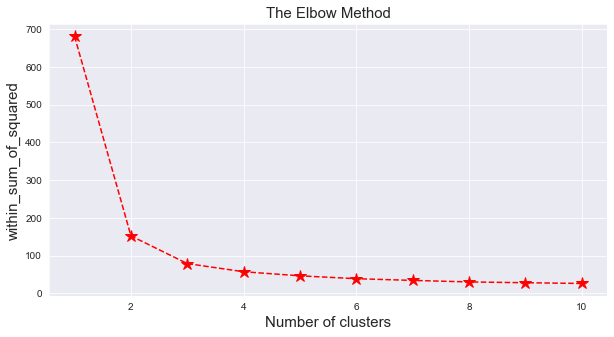

In [25]:
#Elbow Method
plt.figure(figsize=(10,5))
plt.plot(range(1,11),within_sum_of_squared,'r--*',markersize=13)
plt.title('The Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('within_sum_of_squared',fontsize=15)
plt.show()

In [26]:
k_means=KMeans( n_clusters=3,algorithm='auto',init='k-means++',random_state=5)
predicted_k_means=k_means.fit_predict(X)

In [27]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(Y, predicted_k_means))

Homogeneity: 0.751


In [28]:
x=X.values

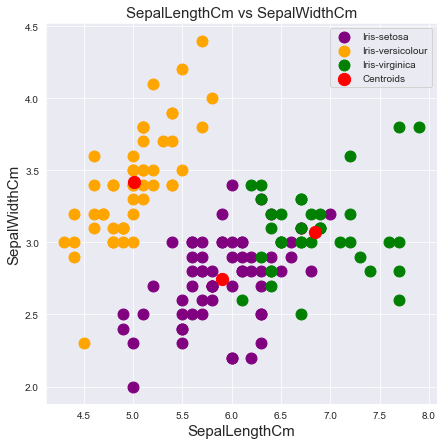

In [29]:
#Visualising the clusters b/w SepalLengthCm vs SepalWidthCm
plt.figure(figsize=(7,7))
plt.scatter(x[predicted_k_means == 0,0], x[predicted_k_means == 0,1], s = 120, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[predicted_k_means == 1,0], x[predicted_k_means == 1,1], s = 120, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[predicted_k_means == 2,0], x[predicted_k_means == 2,1], s = 120, c = 'green', label = 'Iris-virginica')


#Plotting the centroids of the clusters b/w SepalLengthCm vs SepalWidthCm

plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s = 150, c = 'red', label = 'Centroids')
plt.title('SepalLengthCm vs SepalWidthCm',fontsize=15)
plt.xlabel('SepalLengthCm',fontsize=15)
plt.ylabel('SepalWidthCm',fontsize=15)
plt.legend()
plt.show()

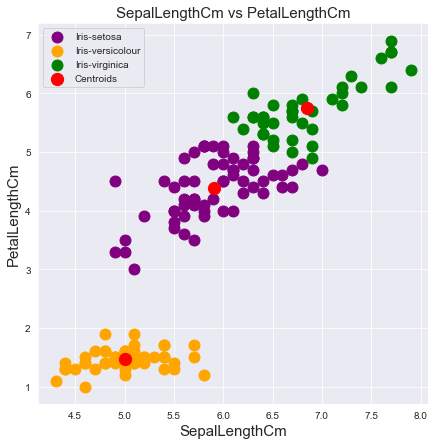

In [30]:
#Visualising the clusters b/w SepalLengthCm vs PetalLengthCm
plt.figure(figsize=(7,7))
plt.scatter(x[predicted_k_means == 0,0], x[predicted_k_means == 0,2], s = 120, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[predicted_k_means == 1,0], x[predicted_k_means == 1,2], s = 120, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[predicted_k_means == 2,0], x[predicted_k_means == 2,2], s = 120, c = 'green', label = 'Iris-virginica')


#Plotting the centroids of the clusters b/w SepalLengthCm vs PetalLengthCm

plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,2], s = 150, c = 'red', label = 'Centroids')
plt.title('SepalLengthCm vs PetalLengthCm',fontsize=15)
plt.xlabel('SepalLengthCm',fontsize=15)
plt.ylabel('PetalLengthCm',fontsize=15)
plt.legend()
plt.show()

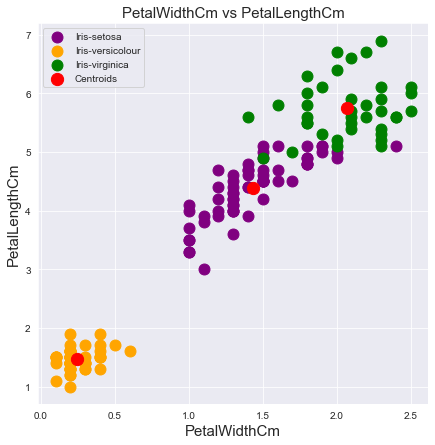

In [31]:
#Visualising the clusters b/w PetalWidthCm vs PetalLengthCm
plt.figure(figsize=(7,7))
plt.scatter(x[predicted_k_means == 0,3], x[predicted_k_means == 0,2], s = 120, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[predicted_k_means == 1,3], x[predicted_k_means == 1,2], s = 120, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[predicted_k_means == 2,3], x[predicted_k_means == 2,2], s = 120, c = 'green', label = 'Iris-virginica')


#Plotting the centroids of the clusters b/w PetalWidthCm vs PetalLengthCm

plt.scatter(k_means.cluster_centers_[:,3], k_means.cluster_centers_[:,2], s = 150, c = 'red', label = 'Centroids')
plt.title('PetalWidthCm vs PetalLengthCm',fontsize=15)
plt.xlabel('PetalWidthCm',fontsize=15)
plt.ylabel('PetalLengthCm',fontsize=15)
plt.legend()
plt.show()

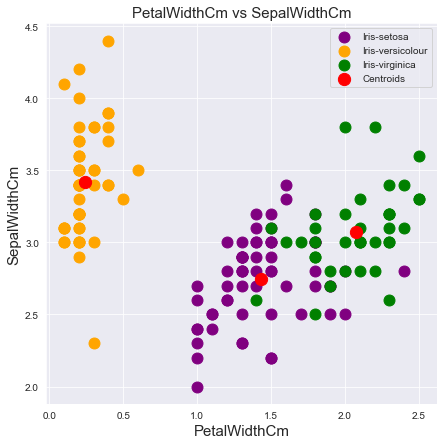

In [32]:
#Visualising the clusters b/w PetalWidthCm vs SepalWidthCm
plt.figure(figsize=(7,7))
plt.scatter(x[predicted_k_means == 0,3], x[predicted_k_means == 0,1], s = 120, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[predicted_k_means == 1,3], x[predicted_k_means == 1,1], s = 120, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[predicted_k_means == 2,3], x[predicted_k_means == 2,1], s = 120, c = 'green', label = 'Iris-virginica')


#Plotting the centroids of the clusters b/w PetalWidthCm vs SepalWidthCm

plt.scatter(k_means.cluster_centers_[:,3], k_means.cluster_centers_[:,1], s = 150, c = 'red', label = 'Centroids')
plt.title('PetalWidthCm vs SepalWidthCm',fontsize=15)
plt.xlabel('PetalWidthCm',fontsize=15)
plt.ylabel('SepalWidthCm',fontsize=15)
plt.legend()
plt.show()

# Visualize the graph between 'Predicted' vs 'Actual'

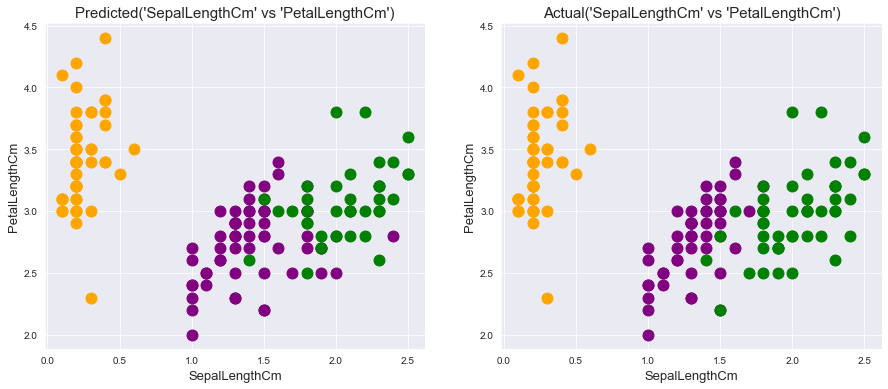

In [33]:
fig,(ax1,ax2)= plt.subplots(ncols=2,nrows=1,figsize=(15,6))
ax1.scatter(x[predicted_k_means == 0,3], x[predicted_k_means == 0,1], s = 120, c = 'purple', label = 'Iris-setosa')
ax1.scatter(x[predicted_k_means == 1,3], x[predicted_k_means == 1,1], s = 120, c = 'orange', label = 'Iris-versicolour')
ax1.scatter(x[predicted_k_means == 2,3], x[predicted_k_means == 2,1], s = 120, c = 'green', label = 'Iris-virginica')

ax2.scatter(x[Y == 0,3], x[Y == 0,1], s = 120, c = 'orange', label = 'Iris-setosa')
ax2.scatter(x[Y == 1,3], x[Y == 1,1], s = 120, c = 'purple', label = 'Iris-versicolour')
ax2.scatter(x[Y == 2,3], x[Y == 2,1], s = 120, c = 'green', label = 'Iris-virginica')


ax1.set_title("Predicted('SepalLengthCm' vs 'PetalLengthCm')",fontsize=15)
ax1.set_xlabel('SepalLengthCm',fontsize=13)
ax1.set_ylabel('PetalLengthCm',fontsize=13)

ax2.set_title("Actual('SepalLengthCm' vs 'PetalLengthCm')",fontsize=15)
ax2.set_xlabel('SepalLengthCm',fontsize=13)
ax2.set_ylabel('PetalLengthCm',fontsize=13)
plt.show()

### Homogeneity Score of DBSCAN ALGORITHM : 60%

### Homogeneity Score of K-Means ALGORITHM : 75%

#### So when K-Means Algorithm is better compared to DBSCAN Algoithm for this dataset....